# Lab 1  


导入的包都写在前面。

In [1]:
import re
import math
import numpy as np
import torch
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import pickle
import time
from IPython.display import Latex
from matplotlib import pyplot as plt

# 1. Write a Python function that takes a list and returns a new list with unique elements of the first list.

In [2]:
def unique(list):
    ret = []
    for x in list:
        flag = False
        for y in ret:
            if x == y:   
                flag = True 
        if not flag: ret.append(x)
    return  ret

# test my function
test_list = [1, 2, 3, 3, 3, 3, 4, 5]
print("output:\t", unique(test_list))  

output:	 [1, 2, 3, 4, 5]


# 2. Write a Python function that checks whether a passed string is palindrome or not. 
A palindrome is a word, phrase, or sequence that reads the same backward as forward. For example, both “madam” and “nurses run”
are palindromes.

In [3]:
def palindrome(str):
    str = str.replace(' ','')       # remove space first
    i = 0                        
    j = len(str)-1                  
    while i<j and str[i]==str[j]:
        i += 1
        j -= 1
    if i>=j: return True
    return False

# test my function
test1 = "madam"
test2 = "nurses run"
test3 = "wrong answer!"
print(palindrome(test1))
print(palindrome(test2))
print(palindrome(test3))

True
True
False


# 3. Write a NumPy program to find the real and imaginary parts of an array of complex numbers.

In [4]:
x = np.array([ 1.00000000+0.j, 0.70710678+0.70710678j])
real = np.real(x)       # extract real part
imag = np.imag(x)       # extract imaginary part
ret = [ [real[i],imag[i]] for i in range(len(x)) ]
print(ret)

[[1.0, 0.0], [0.70710678, 0.70710678]]


# 4. Write a Python program to add two binary numbers.

简要说一下思路，先把输入的两个字符串补齐，之后使用位运算的思想进行加法运算，并考虑进位问题，最后输出是因为最后一个进位没有被存在ret里，需要额外注意。

In [5]:
def add_Binary(num):
    ret = ''
    carry = '0' 
    a = num[0]
    b = num[1]   
    len_a = len(a)
    len_b = len(b)
    if len_a > len_b:  # fill the gap between a and b with '0'
        b = '0'*(len_a-len_b) + b
    else:
        a = '0'*(len_b-len_a) + a
    for i in range(len(a)-1, -1, -1):
        if (carry == '1')^(a[i] == '1')^(b[i] == '1'): 
            ret = '1' + ret
            if not (carry == a[i] == b[i] == '1'):
                carry = '0'
        else: 
            ret = '0' + ret
            if not (carry == a[i] == b[i] == '0'):
                carry = '1'
    return ret if carry == '0' else '1' + ret  
    

# test my function
num1 = ('11','1')
num2 = ('0','0')
num3 = ('0','1010111')
print("output1: ", add_Binary(num1))
print("output2: ", add_Binary(num2))
print("output3: ", add_Binary(num3))

output1:  100
output2:  0
output3:  1010111


# 5. You are given two non-empty linked lists representing two non-negative integers. 
The digits are stored in reverse order and each of their nodes contain a single digit. Add the two numbers and return it as a linked
list. You may assume the two numbers do not contain any leading zero, except the number 0 itself.

In [6]:
# Definition for singly-linked list.
class ListNode:
    def __init__(self, x):
        self.val = x
        self.next = None

def trans(lst):
    lst.reverse()
    current = ListNode(lst[0])
    for i in range(1,len(lst)):
        tmp = ListNode(lst[i])
        tmp.next = current
        current = tmp
    return current

def read(input_str):
    input_str = input_str.split('+',1)
    l1 = re.findall("[0-9]", input_str[0])
    l2 = re.findall("[0-9]", input_str[1])
    l1 = trans([int(each) for each in l1])     
    l2 = trans([int(each) for each in l2])     
    return l1,l2

def showlist(lst):
    tmp = []
    while lst!=None:
        tmp.append(str(lst.val))
        lst = lst.next
    print(" -> ".join(tmp))

def addTwoNumbers(l1,l2):
    root = ListNode(0)
    current = root
    carry = 0
    while l1 or l2:
        v1 = v2 = 0
        if l1:
            v1 = l1.val
            l1 = l1.next
        if l2:
            v2 = l2.val
            l2 = l2.next
        val = v1 + v2 + carry
        carry = val // 10
        val = val % 10
        tmp = ListNode(val)
        current.next = tmp
        current = current.next
    if carry:
        tmp = ListNode(carry)
        current.next = tmp
    return root.next

# test my function
input_str = "(2 -> 4 -> 3) + (5 -> 6 -> 4)"
l1, l2 = read(input_str)     
l3 = addTwoNumbers(l1,l2)

showlist(l3)        


7 -> 0 -> 8


# 6. Implement quick sort  
Reference : Introduction to Algorithm

In [7]:
def quick_sort(array,l,r):
    if l < r:
        q = partition(array, l, r)
        quick_sort(array, l, q - 1)
        quick_sort(array, q + 1, r)
    return array
 
def partition(array, l, r):
    x = array[r]
    i = l - 1
    for j in range(l, r):
        if array[j] <= x:
            i += 1
            array[i], array[j] = array[j], array[i]
    array[i + 1], array[r] = array[r], array[i+1]
    return i + 1

# test my function
test = [1,-5,4,1,6,235,167,-1,32,2,7,8]
print("Output: ",quick_sort(test,0,len(test)-1))

Output:  [-5, -1, 1, 1, 2, 4, 6, 7, 8, 32, 167, 235]


# 7. Implement shell sort

In [8]:
def insert_sort(array, start, gap):   
    for i in range(1,(len(array)-start)//gap):    
        pos = start+gap*i
        while pos>start and array[pos]<array[pos-gap]:
            array[pos], array[pos-gap] = array[pos-gap], array[pos]
            pos -= gap

def shell_sort(array):
    gap = len(array)//2   
    while gap>0:
        for i in range(0,gap):
            insert_sort(array, i, gap)
        gap = gap//2     
    return array

# test my function
test = [1,-5,4,1,6,235,167,-1,32,2,7,8]
print("Output: ",shell_sort(test))

Output:  [-5, -1, 1, 1, 2, 4, 6, 7, 8, 32, 167, 235]


# 8. Implement linear regression model and use autograd to optimize it by Pytorch.  
A linear function is defined as $f(x) = w^T x + b$, 
where $w^T = [w_1,w_2,...,w_k]$.

Given parameters $w$ and $b$ of linear function $f(x)$, 
add some noise to create data near the linear function.

The loss function is usually defined as $\frac{1}{n} \sum_{i=1}^{n} (f(x^{(i)})-y^{(i)})^2$   
And that is the MSELoss.


epoch = 0 	 loss =  39422.92578125
epoch = 100 	 loss =  200.6153106689453
epoch = 200 	 loss =  137.56419372558594
epoch = 300 	 loss =  95.19458770751953
epoch = 400 	 loss =  66.72260284423828
epoch = 500 	 loss =  47.58984375
epoch = 600 	 loss =  34.73270034790039
epoch = 700 	 loss =  26.09292221069336
epoch = 800 	 loss =  20.28707504272461
epoch = 900 	 loss =  16.385610580444336
w =  2.0671918392181396
b =  3.030674695968628


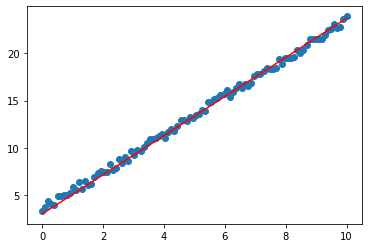

In [9]:

def create_data(w,b):
    x = torch.linspace(0,10,100).unsqueeze(dim=1)
    y = w*x + b + torch.rand(x.shape)
    return x,y

    
class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel,self).__init__()
        self.linear = torch.nn.Linear(1,1)
        
    def forward(self,x):
        y_pred = self.linear(x)
        return y_pred

model = LinearModel()

criterion = torch.nn.MSELoss(reduction = 'sum')
optimizer = torch.optim.SGD(model.parameters(),lr = 0.00004)

my_w = 2
my_b = 3
x, y = create_data(my_w,my_b) 

for epoch in range(1000):
    y_pred = model(x)
    loss = criterion(y_pred,y)
    if epoch%100 == 0:
        print("epoch =",epoch,"\t loss = ",loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print('w = ',model.linear.weight.item())
print('b = ',model.linear.bias.item())
        
plt.scatter(x,y)
yy = x*model.linear.weight.item()+model.linear.bias.item()
plt.plot(x,yy,c='red')
plt.show()

We can see that the parameter after training is closed to $[2,3]$.

# 9. Implement logistic regression model and use autograd to optimize it by Pytorch.  

We create data according to the principle below:  
if $\sigma ( x^{(i)})>0.5$ then $y^{(i)}=1$  else $y^{(i)}=0$

Denote
 $X = \begin{bmatrix}
      x^{(1)}_1       & \cdots    & x^{(1)}_k      \\
      \vdots          & \ddots    & \vdots         \\
      x^{(n)}_1       & \cdots    & x^{(n)}_k  
      \end{bmatrix}$, 
 $Y=[y^{(1)}, y^{(2)}, ..., y^{(n)}]^T$.
 
In logistic regression, we want to maximize the likelihood, i.e.,
$max_{\theta} \prod_{Y^{(i)}=1} \frac{e^{\theta^T x^{(i)}  }}{1+e^{\theta^Tx^{(i)} }}
\prod_{Y^{(i)}=0} \frac{1}{1+e^{\theta ^T x^{(i)} }}$. 
Equivalently, we can take log-transformation, i.e.,
$\sum_{i=1}^{n}-y^{(i)}log(\sigma(x^{(i)}))-(1-y^{(i)} )log(1-\sigma(x^{(i)}))$  
That is called BCELoss.


epoch = 0 	 loss =  350.4832458496094
epoch = 100 	 loss =  4.5151567459106445
epoch = 200 	 loss =  3.198235034942627
epoch = 300 	 loss =  2.692111015319824
epoch = 400 	 loss =  2.414580821990967
epoch = 500 	 loss =  2.2357711791992188
epoch = 600 	 loss =  2.1092476844787598
epoch = 700 	 loss =  2.0140316486358643
epoch = 800 	 loss =  1.9391738176345825
epoch = 900 	 loss =  1.8783706426620483


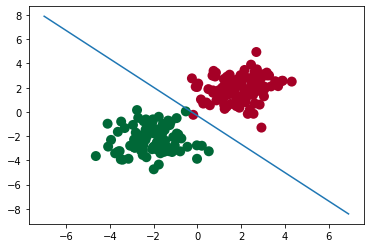

In [10]:
def create_data():
    n_data = torch.ones(100, 2)
    x0 = torch.normal(2 * n_data, 1)  
    y0 = torch.zeros(100)
    x1 = torch.normal(-2 * n_data, 1)  
    y1 = torch.ones(100)

    x=torch.cat((x0,x1),0).type(torch.FloatTensor)
    y=torch.cat((y0,y1),0).type(torch.FloatTensor).unsqueeze(dim=1)
    
    return x,y



class LogisticRegression(torch.nn.Module):
    def __init__(self):
        super(LogisticRegression,self).__init__()
        self.linear=torch.nn.Linear(2,1)   
         

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        
        return y_pred

model=LogisticRegression()

criterion = torch.nn.BCELoss(reduction = 'sum')   
optimizer = torch.optim.SGD(model.parameters(),lr=1e-3)  

x,y = create_data()

for epoch in range(1000):
    y_pred = model(x)
    loss=criterion(y_pred,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if  epoch%100==0:
         print("epoch =",epoch,"\t loss = ",loss.item())
       
w0,w1=model.linear.weight[0]
w0=float(w0.item())
w1=float(w1.item())
b=float(model.linear.bias.item())
plot_x=np.arange(-7,7,0.1)
plot_y=(-w0*plot_x-b)/w1
plt.scatter(x.data.numpy()[:,0],x.data.numpy()[:,1],c=y.data.numpy(),s=100,lw=0,cmap='RdYlGn')
plt.plot(plot_x,plot_y)
plt.show()


# 10. Implement linear SVM model for binary classification task and use autograd to optimize it by Pytorch.  

 

The hyperplane is defined as $w^T x + b$, which can be written as 
$W^T x$, denote $w_0 = b$ , then $W=[w_0,w_1,w_2,...,w_k]^T$ and $x=[1,x_1,x_2,...,x_k]^T$.  
Denote  
 $X = \begin{bmatrix}
      1   &x^{(1)}_1       & \cdots    & x^{(1)}_k      \\
      1    &\vdots          & \ddots    & \vdots         \\
      1    & x^{(n)}_1       & \cdots    & x^{(n)}_k   
      \end{bmatrix}$, 
 $Y=[y^{(1)}, y^{(2)}, ..., y^{(n)}]^T$.
 
The loss function is $\sum_i max \{0， 1-Y^{(i)}X^{(i)}W \}$.  
Considering Task 11, I use a simple method to solve Task10.

Loss in iteration 0 	 tensor(376.9164, grad_fn=<SumBackward0>)
Loss in iteration 1000 	 tensor(3.9453, grad_fn=<SumBackward0>)
Loss in iteration 2000 	 tensor(1.8499, grad_fn=<SumBackward0>)
Loss in iteration 3000 	 tensor(1.5609, grad_fn=<SumBackward0>)
Loss in iteration 4000 	 tensor(0.6652, grad_fn=<SumBackward0>)
Loss in iteration 5000 	 tensor(0.0923, grad_fn=<SumBackward0>)
Loss in iteration 6000 	 tensor(0.0681, grad_fn=<SumBackward0>)
Parameter after training:	 tensor([[ 0.9882],
        [ 0.9940],
        [-9.9108]], requires_grad=True)


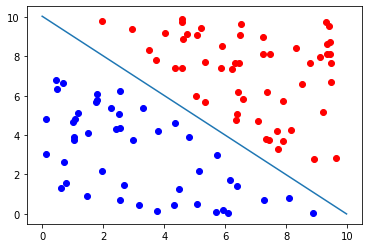

In [11]:
# manually lable two diffenrent kinds of data
def create_data(w,n):
    x = np.hstack( (10*np.random.random((n,len(w)-1)),np.ones((n,1))) )
    y = []
    for i in range(n):
        while abs(np.dot(x[i,:],w))<1:
            x[i,0:len(w)-1]=10*np.random.random((1,len(w)-1))
        if np.dot(x[i,:],w)>0:  y.append(1)
        else:   y.append(-1)
    return torch.from_numpy(x).float(), torch.from_numpy(np.array(y)).float().reshape(n,1)

def plot(x,y,w):
        plt.scatter([float(x[i,0]) for i in range(x.shape[0]) if y[i,0]==1 ], 
                    [float(x[i,1]) for i in range(x.shape[0]) if y[i,0]==1 ], c='red')
        plt.scatter([float(x[i,0]) for i in range(x.shape[0]) if y[i,0]==-1 ], 
                    [float(x[i,1]) for i in range(x.shape[0]) if y[i,0]==-1 ], c='blue')
        plt.plot([0,-w[2]/w[1]],[-w[2]/w[0],0])

alpha = 1e-3                       
my_w = [1,1,-10]                      
x, y = create_data(my_w,100)

w = torch.ones(len(my_w),1,requires_grad=True)
last_loss = 0

for i in range(10000):
    tmp = torch.cat( ( torch.ones((x.shape[0],1))-y.mul(x.mm(w)), torch.zeros((x.shape[0],1)) ), 1 )
    loss = torch.sum(torch.max(tmp,1)[0])                        # loss function for SVM
    loss.backward()
    w.data.sub_(alpha*w.grad)               
    w.grad.zero_()                          
    if abs(last_loss - loss)<1e-6: break      
    last_loss = loss
    if i%1000==0:    print("Loss in iteration", i, "\t", loss)
    
print("Parameter after training:\t",w)  
plot(x,y,w)
    


 As above,our true line is exactly
 $y=10-x$. After training, the result is closed to the actual line.

# 11.Add a Frobenius norm penalty for the weight w in your SVM model by two different ways:
(1) use a pytorch function to calculate the norm; (2) implement the code by yourself.



(1)just use the torch.norm(x) function.

In [12]:
w = torch.ones(len(w),1,requires_grad=True)
last_loss = 0
for i in range(10000):
    tmp = torch.cat( ( torch.ones((x.shape[0],1))-y.mul(x.mm(w)), torch.zeros((x.shape[0],1)) ), 1 )
    loss = torch.sum(torch.max(tmp,1)[0])+torch.norm(w[0:-1])   # loss function with F norm
    loss.backward()
    w.data.sub_(alpha*w.grad)               
    w.grad.zero_()      
    if abs(last_loss-loss)<1e-6: break  
    last_loss = loss
    if i%1000==0:    print("Loss in iteration", i, "\t", loss)
    
print("Parameter after training:\t",w)  


Loss in iteration 0 	 tensor(378.3306, grad_fn=<AddBackward0>)
Loss in iteration 1000 	 tensor(4.9509, grad_fn=<AddBackward0>)
Loss in iteration 2000 	 tensor(3.1767, grad_fn=<AddBackward0>)
Loss in iteration 3000 	 tensor(2.4896, grad_fn=<AddBackward0>)
Loss in iteration 4000 	 tensor(2.3828, grad_fn=<AddBackward0>)
Loss in iteration 5000 	 tensor(1.4794, grad_fn=<AddBackward0>)
Loss in iteration 6000 	 tensor(1.5028, grad_fn=<AddBackward0>)
Loss in iteration 7000 	 tensor(1.4796, grad_fn=<AddBackward0>)
Loss in iteration 8000 	 tensor(1.4785, grad_fn=<AddBackward0>)
Loss in iteration 9000 	 tensor(1.4489, grad_fn=<AddBackward0>)
Parameter after training:	 tensor([[ 0.9810],
        [ 0.9901],
        [-9.8128]], requires_grad=True)


(2)write a function of my own.  
Since $w$ is an vector,
its Frobenius norm is $||w||_F = \sqrt{\sum_{i=1}^{k} w_k^2}$.

In [13]:
w = torch.ones(len(w),1,requires_grad=True)
last_loss = 0
for i in range(10000):
    tmp = torch.cat( ( torch.ones((x.shape[0],1))-y.mul(x.mm(w)), torch.zeros((x.shape[0],1)) ), 1 )
    loss = torch.sum(torch.max(tmp,1)[0]) + torch.sqrt(torch.sum(w[0:-1,0]**2))   # loss function with F norm
    loss.backward()
    w.data.sub_(alpha*w.grad)               
    w.grad.zero_()      
    if abs(last_loss-loss)<1e-6: break  
    last_loss = loss
    if i%1000==0:    print("Loss in iteration", i, "\t", loss)
    
print("Parameter after training:\t",w)  


Loss in iteration 0 	 tensor(378.3306, grad_fn=<AddBackward0>)
Loss in iteration 1000 	 tensor(4.9509, grad_fn=<AddBackward0>)
Loss in iteration 2000 	 tensor(3.1767, grad_fn=<AddBackward0>)
Loss in iteration 3000 	 tensor(2.4896, grad_fn=<AddBackward0>)
Loss in iteration 4000 	 tensor(2.3828, grad_fn=<AddBackward0>)
Loss in iteration 5000 	 tensor(1.4794, grad_fn=<AddBackward0>)
Loss in iteration 6000 	 tensor(1.5028, grad_fn=<AddBackward0>)
Loss in iteration 7000 	 tensor(1.4796, grad_fn=<AddBackward0>)
Loss in iteration 8000 	 tensor(1.4785, grad_fn=<AddBackward0>)
Loss in iteration 9000 	 tensor(1.4489, grad_fn=<AddBackward0>)
Parameter after training:	 tensor([[ 0.9810],
        [ 0.9901],
        [-9.8128]], requires_grad=True)


When having the same input samples, the results of two different implementation are equal.

# 12. Download CIFAR-10 dataset1 and visualize some of its images.
(For task 12 to 15)  
Reference:https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py    
Slides: *Python,Tensorflow and Pytorch for DNN* by Chenjie Cao, Yikai Wang, Yanwei Fu

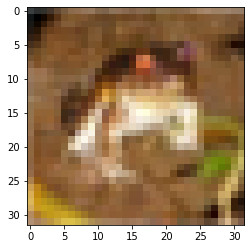

In [14]:
def unpickle(file):
   with open(file, 'rb') as f:
      dict = pickle.load(f, encoding='bytes')
   return dict

def imshow(img):
   img = [ [ [ img[i*32+j],img[1024+i*32+j],img[2048+i*32+j] ] for j in range(32)] for i in range(32)]
   plt.imshow(img)
   plt.show()

# show the first image in batch_1 data
data = unpickle('../input/cifar10-python/cifar-10-batches-py/data_batch_1') 
imshow(data[b'data'][0])
   

# 13. Write a dataset class for loading CIFAR-10. Make sure it could be transferred to Pytorch Dataloader. 
The class should meet the following requirements: (1) Inherit pytorch’s DataSet class; (2) Load the image file and
save in proper way; (3) Override __getitem__ and __len__ methods.

6
frog


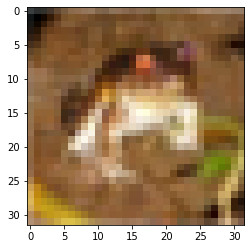

In [15]:
class my_CIFAR10(torch.utils.data.Dataset):
    def __init__(self,data,labels):
        super(my_CIFAR10,self).__init__()
        self.data = data
        self.labels = labels
        self.transform = transforms.Compose([transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
        
    def __getitem__(self, index):
        img = self.data[index]
        image = torch.tensor(image,dtype = torch.float)
        
        label = self.labels[index]
        label = torch.tensor(label,dtype = torch.long)

        return img,label 
    
    # return the number of images
    def __len__(self):
        return len(self.data)
    
def unpickle(file):
    with open(file,'rb') as f:
        return pickle.load(f,encoding = 'latin1')
        
def read_data(data_dict):
    img = np.array(data_dict['data']).reshape(-1,3,32,32)
    img = np.transpose(img, (0,2,3,1))
    label = np.array(data_dict['labels'])
    return img,label

data_dict = unpickle("../input/cifar10-python/cifar-10-batches-py/data_batch_1")
meta_dict = unpickle("../input/cifar10-python/cifar-10-batches-py/batches.meta")
img,label = read_data(data_dict)
dataset = my_CIFAR10(img,label)
dataLoader = DataLoader(dataset,batch_size = 64,shuffle = True)

# test my funcition
print(label[0])
print(meta_dict['label_names'][label[0]])
plt.imshow(img[0])
plt.show()

From the test above, we can see that myCIFAR10 can load the correct image and save it in proper way.   
Because   
1.we open the same picture as task 12.  
2.we can get the right label index 6 and find the label name frog. 

# 14. Run one epoch for loading CIFAR-10 with Pytorch Dataloader and test the loading time of different batch_size
(1, 4, 64, 1024), different num_workers (0,1,4,16), and whether use pin_memory or not.

In [16]:
# use encoding of 'bytes' may solve this task more easily
def unpickle(file):
   with open(file, 'rb') as f:
      dict = pickle.load(f, encoding = 'bytes')
   return dict

data = []

# run one epoch
for i in range(1,6):
    tmp = unpickle("../input/cifar10-python/cifar-10-batches-py/data_batch_"+str(i))
    data.extend(tmp[b'data'].astype('int64'))

for batch_size_ in [1, 4, 64, 1024]:
    start_time = time.time()
    dataloader = DataLoader(data,batch_size = batch_size_ ,shuffle = True)
    end_time = time.time()
    print( "Time cost of batch size\t",batch_size_,"\t:\t %f s"%(end_time - start_time))
    
for num_workers_ in [0,1,4,16]:
    start_time = time.time()
    dataloader = DataLoader(data, batch_size = 4, shuffle = True, num_workers=num_workers_)
    end_time = time.time()
    print( "Time cost of workers\t",num_workers_,"\t:\t %f s"%(end_time-start_time))
    
for pin_memory_ in [True, False]:
    start_time = time.time()
    dataloader = DataLoader(data, batch_size = 4, shuffle = True, pin_memory = pin_memory_)
    end_time = time.time()
    print( "Time cost of pin_memory\t",pin_memory_,"\t:\t %f s"%(end_time - start_time) )


Time cost of batch size	 1 	:	 0.000088 s
Time cost of batch size	 4 	:	 0.000029 s
Time cost of batch size	 64 	:	 0.000024 s
Time cost of batch size	 1024 	:	 0.000023 s
Time cost of workers	 0 	:	 0.000028 s
Time cost of workers	 1 	:	 0.000030 s
Time cost of workers	 4 	:	 0.000066 s
Time cost of workers	 16 	:	 0.000032 s
Time cost of pin_memory	 True 	:	 0.000032 s
Time cost of pin_memory	 False 	:	 0.000024 s


# 15. Calculate the mean and std of CIFAR-10’ training set within each RGB channel.  
To calculate mean and std from the original data, I don't use dataloader 
in order to avoid transformation of raw data,  
because dataloader uses tensor, which has been transformed from numpy.

CIFAR-10 has 10000 images, each has 3072 pixels storing as 1*3072 array.
$data[i][0:1024]$ is the red channel, 
$data[i][1024:2048]$ is the green channel, 
and $data[i][2048:3072]$ is the blue channel.

And we use np functions to calculate mean and std.

In [17]:
# Still, use encoding of 'bytes' may solve this task more easily
def unpickle(file):
   with open(file, 'rb') as f:
      dict = pickle.load(f, encoding = 'bytes')
   return dict

data = []

for i in range(1,6):
    tmp = unpickle("../input/cifar10-python/cifar-10-batches-py/data_batch_"+str(i))
    data.extend(tmp[b'data'].astype('int64'))
    
channels = {0:'Red-channel',1:'Green-channel',2:'Blue-channel'}
data = np.array(data)

for x in channels:
    print(channels[x])
    mean = data[:,x*1024:(x*1024+1024)].mean()
    std = data[:,x*1024:(x*1024+1024)].std()
    print("Mean:\t\t", mean)
    print("Std:\t\t", std)
    

Red-channel
Mean:		 125.306918046875
Std:		 62.993219278136884
Green-channel
Mean:		 122.950394140625
Std:		 62.08870764001421
Blue-channel
Mean:		 113.86538318359375
Std:		 66.70489964063091


# 16. Numpy exercises  
• Consider a random 10x2 matrix representing cartesian coordinates, convert them to polar coordinates.  


In [18]:
cartesion = -5 + 10 * np.random.random((10,2))       
polar = np.zeros_like(cartesion)            

polar[:,0] = np.linalg.norm(cartesion,axis=1,ord=2) 
for i in range(cartesion.shape[0]):                     
    polar[i,1] = math.atan2(cartesion[i,1],cartesion[i,0])
    if polar[i,1]<0:                                    # make sure theta falls into [0,2*pi]
        polar[i,1] += 2*math.pi
print("cartesion coordinates:\n", cartesion)
print("polar coordinates after converting:\n", polar)

cartesion coordinates:
 [[ 2.25715246 -1.25929494]
 [ 4.1407307  -2.4359713 ]
 [ 3.41047086  1.84526719]
 [-3.69392034 -1.66880552]
 [-0.03374085  1.27336491]
 [ 0.28092673  2.65252686]
 [-4.52234277 -3.5963414 ]
 [ 4.97547736  2.39139649]
 [ 2.2814023   0.84432233]
 [ 2.22055462  0.1031187 ]]
polar coordinates after converting:
 [[2.58467812 5.77428708]
 [4.80412395 5.75141686]
 [3.87766972 0.49595309]
 [4.05338863 3.56591824]
 [1.27381185 1.59728752]
 [2.66736172 1.46528057]
 [5.77799754 3.81342353]
 [5.52033986 0.44803723]
 [2.43262752 0.35445837]
 [2.22294766 0.04640493]]


• Create a 2D array subclass such that Z[i, j] == Z[j, i]. 

In [19]:
class sym_matrix(np.ndarray):         
    def __new__(cls, shape): 
        array = super(sym_matrix, cls).__new__(cls, (shape,shape))
        for i in range(shape):
            for j in range(0,i+1):
                array.__setitem__((j,i),array[0,0])   # set all the elements of Z at zero while generating Z
        return  array 
    def __setitem__(self, key, value):
        i, j = key
        super(sym_matrix, self).__setitem__((i,j),value)
        super(sym_matrix, self).__setitem__((j,i),value)

Z = sym_matrix(5)             
print("Generate a 5*5 matrix:\n",Z)   

# edit the value in (1,1) and (0,3)
Z[1,1] = -5
Z[0,3] = 3
print("The matrix after edition:\n",Z)  # we can see that both (0,3) and (3,0) change simultaneously 
        

Generate a 5*5 matrix:
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
The matrix after edition:
 [[ 0.  0.  0.  3.  0.]
 [ 0. -5.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 3.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


• Consider 2 sets of points P0, P1 describing lines (2d) and a set of points P, how to compute distance
from each point j (P[j]) to each line i (P0[i],P1[i])?  

The line i (P0[i],P1[i]) can be represented as 
$ y = \frac{P1[i][1]-P0[i][1]}{P1[i][0]-P0[i][0]}*(x-P0[i][0])+P0[i][1] $



Hence, the distance from P[j] to line i is
$ \frac{|(P1[i][1]-P0[i][1])*P[j][0]+(P0[i][0]-P1[i][0])*P[j][1] +(P1[i][0]-P0[i][0])*P0[i][1]+(P0[i][1]-P1[i][1])*P0[i][0]|}{\sqrt{(P1[i][1]-P0[i][1])^2+(P0[i][0]-P1[i][0])^2}} $

In [20]:
# test some examples
P0 = [[1,0],[5,3],[-6,-2]]
P1 = [[0,4],[2,1],[8,-4]]

P = [[1,1],[1,-3]]

for j in range(len(P)):         
    for i in range(len(P1)): 
        A = P1[i][1] - P0[i][1]
        B = P0[i][0] - P1[i][0]
        C = (P1[i][0] - P0[i][0]) * P0[i][1] + (P0[i][1] - P1[i][1]) * P0[i][0]
        d = abs(A * P[j][0] + B * P[j][1] + C) / math.sqrt(A**2 + B**2)
        print("Point",P[j],"to line",[P0[i],P1[i]],":\t",d)

Point [1, 1] to line [[1, 0], [0, 4]] :	 0.24253562503633297
Point [1, 1] to line [[5, 3], [2, 1]] :	 0.5547001962252291
Point [1, 1] to line [[-6, -2], [8, -4]] :	 3.959797974644666
Point [1, -3] to line [[1, 0], [0, 4]] :	 0.7276068751089989
Point [1, -3] to line [[5, 3], [2, 1]] :	 2.773500981126146
Point [1, -3] to line [[-6, -2], [8, -4]] :	 0.0


# 17. Bilinear Interpolation  
Please implement the bilinear interpolation algorithm using python. Check this for an introduction to bilinear
interpolation.

In [21]:
def BilinearInterpolation(A, pos):
    x, y = pos[1]-1, pos[0]-1                           
    right = left = max(int(x),0)                        
    if left!=x:     right = min(int(x)+1,len(A[0])-1)  
    down = up = max(int(y),0)                       
    if up!=y:     down = min(int(y)+1,len(A)-1)     
    return 0.25*(A[up][left]+A[down][left]+A[up][right]+A[down][right])

A = ((110, 120, 130),
    (210, 220, 230),
    (310, 320, 330))
print(BilinearInterpolation(A, (1, 1)))
print(BilinearInterpolation(A, (2.5, 2.5)))

110.0
275.0


# 18. Cartesian product  
Given an arbitrary number of vectors, build the cartesian product (every combinations of every item).

I use iteration to solve this problem.

In [22]:
def cart_itr(array):
  results = [[]]
  for i in range(len(array)):
    tmp = []
    for res in results:
      for ele in array[i]:
        tmp.append(res+[ele])
    results = tmp

  return results

test = [[1, 2, 3], [4, 5], [6, 7]]  
res = cart_itr(test)
print(res)

[[1, 4, 6], [1, 4, 7], [1, 5, 6], [1, 5, 7], [2, 4, 6], [2, 4, 7], [2, 5, 6], [2, 5, 7], [3, 4, 6], [3, 4, 7], [3, 5, 6], [3, 5, 7]]


# 19. Extracting a subpart of an array  
Consider an arbitrary array, write a function that extract a subpart with a fixed shape and centered on a
given element (pad with a fill value when necessary)

In [23]:
def sub(Z,shape,fill,position):
    ret = []
    for i in range(position[0]-shape[0]//2,position[0]+shape[0]-shape[0]//2):       
        ret.append([])
        for j in range(position[1]-shape[1]//2,position[1]+shape[1]-shape[1]//2):   
            if i>=0 and j>=0 and i<Z.shape[0] and j<Z.shape[1]:  
                value = Z[i,j]
            else:
                value = fill
            ret[-1].append(value)
    return np.array(ret)

shape = (4, 4)
fill = 0
position = (1,1)
Z = np.random.randint(0, 10, (5, 5))
print("Z:\n", Z)
print("Out:\n",sub(Z,shape,fill,position))

Z:
 [[3 1 1 2 1]
 [9 7 5 8 9]
 [5 6 3 9 6]
 [4 4 0 8 8]
 [7 3 8 3 1]]
Out:
 [[0 0 0 0]
 [0 3 1 1]
 [0 9 7 5]
 [0 5 6 3]]


# 20. Matrix operations
Please implement following matrix (just 2D) operations without numpy:

• add

In [24]:
def add(A, B):
    if len(A)!=len(B) or len(A[0])!=len(B[0]):
        return "Invalid input!"
    ret = []
    for i in range(len(A)):
        ret.append([])
        for j in range(len(A[0])):
            ret[i].append(A[i][j]+B[i][j])
    return ret

• subtract

In [25]:
def subtract(A, B):
    if len(A)!=len(B) or len(A[0])!=len(B[0]):
        return "Invalid input!"
    ret = []
    for i in range(len(A)):
        ret.append([])
        for j in range(len(A[0])):
            ret[i].append(A[i][j]-B[i][j])
    return ret

• scalar multiply

In [26]:
def scalar_multiply(A, x):
    ret = []
    for i in range(len(A)):
        ret.append([])
        for j in range(len(A[0])):
            ret[i].append(x*A[i][j])
    return ret

• multiply

In [27]:
def multiply(A, B):
    if len(A[0])!=len(B):
        return "Invalid input!"
    ret = []
    for i in range(len(A)):
        ret.append([])
        for j in range(len(B[0])):
            tmp = 0
            for k in range(len(B)):
                tmp += A[i][k]*B[k][j]
            ret[i].append(tmp)
    return ret

• identity

In [28]:
def identity(size):
    ret = []
    for i in range(size):
        ret.append([])
        for j in range(size):
            if i==j:
                ret[i].append(1)
            else:
                ret[i].append(0)
    return ret

• transpose

In [29]:
def transpose(A):
    ret = []
    for i in range(len(A[0])):
        ret.append([])
        for j in range(len(A)):
            ret[i].append(A[j][i])
    return ret

• inverse

First, matrix A should be square.  
Second, $det(A) \neq 0$.

We have $A^{-1}=\frac{adj(A)}{det(A)}$

In [30]:
def minor(A,m,n):
    ret = []
    for i in range(len(A)):
        if i!=m:
            ret.append(A[i][0:n]+A[i][n+1::])
    return ret

def det(A):
    if len(A)==1:
        return A[0][0]
    ret = 0
    for i in range(len(A)):
        ret += ((-1)**i)*A[i][0]*det(minor(A,i,0))
    return ret

def adjoint_matrix(A):
    ret = []
    for i in range(len(A)):
        ret.append([])
        for j in range(len(A)):
            ret[i].append( ((-1)**(i+j))*det(minor(A,j,i)) )
    return ret

def inverse(A):
    if len(A)!=len(A[0]):
        return "Matrix not square!"
    if det(A)==0:
        return "Matrix singular!"
    if len(A)==1:
        return [[1/A[0][0]]]
    return scalar_multiply(adjoint_matrix(A),1/det(A))

Now, test all the functions above.

In [31]:
matrix_a = [[12, 10], [3, 9]]
matrix_b = [[3, 4], [7, 4]]
matrix_c = [[11, 12, 13, 14], [21, 22, 23, 24], [31, 32, 33, 34], [41, 42, 43, 44]]
matrix_d = [[3, 0, 2], [2, 0, -2], [0, 1, 1]]

print("add(matrix_a, matrix_b)==",add(matrix_a, matrix_b))
print("subtract(matrix_a, matrix_b)==",subtract(matrix_a, matrix_b))
print("scalar_multiply(matrix_b, 3)==",scalar_multiply(matrix_b, 3))
print("multiply(matrix_a, matrix_b)==",multiply(matrix_a, matrix_b))
print("identity(3)==",identity(3))
print("transpose(matrix_c)==",transpose(matrix_c))
print("inverse(matrix_d)==",inverse(matrix_d))


add(matrix_a, matrix_b)== [[15, 14], [10, 13]]
subtract(matrix_a, matrix_b)== [[9, 6], [-4, 5]]
scalar_multiply(matrix_b, 3)== [[9, 12], [21, 12]]
multiply(matrix_a, matrix_b)== [[106, 88], [72, 48]]
identity(3)== [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
transpose(matrix_c)== [[11, 21, 31, 41], [12, 22, 32, 42], [13, 23, 33, 43], [14, 24, 34, 44]]
inverse(matrix_d)== [[0.2, 0.2, 0.0], [-0.2, 0.30000000000000004, 1.0], [0.2, -0.30000000000000004, 0.0]]


# 21. Greatest common divisor  
Find the greatest common divisor(gcd) of two integers.

In [32]:
def GCD(a,b):
    a, b = abs(a), abs(b)   
    a, b = max(a,b), min(a,b)   
    if b==0:                    
        return a
    if a%b==0:
        return b
    return GCD(a-b,b)

print("GCD(3,5) = ",GCD(3,5))
print("GCD(6,3) = ",GCD(6,3))
print("GCD(-2,6)= ",GCD(-2,6))
print("GCD(0,3) = ",GCD(0,3))

GCD(3,5) =  1
GCD(6,3) =  3
GCD(-2,6)=  2
GCD(0,3) =  3


# 22.Find all consecutive positive number sequences whose sum is N.  

Notice that be careful not to miss the solution N itself.


In [33]:
def seq(N):
    ret = []
    for i in range(N+1):
        sum = 0
        for j in range(i,N+1):
            sum += j
            if sum == N:
                ret.append([x for x in range(i,j+1)])
            if sum > N:
                break
    return ret

ret = seq(1000)
print(ret)



[[28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52], [55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70], [198, 199, 200, 201, 202], [1000]]


# 23. Password checking  
A website requires the users to input username and password to register. Write a programto check the validity
of password input by users. Following are the criteria for checking the password:
(略)

利用正则表达式即可(不会写英文)。

In [34]:
def pw_check(str):
    lower_case = re.search("[a-z]",str)
    upper_case = re.search("[A-Z]",str)
    number = re.search("[0-9]",str)
    special = re.search("[$#@]",str)
    if len(str) in range(6,13) and lower_case and upper_case and number and special:
        return True
    else: 
        return False

passwords = ["ABd1234@1","a F1#","2w3E*","2We3345"]
for pw in passwords:
    if(pw_check(pw)):
        print(pw)

ABd1234@1
